# Project High dimensional dynamic stochastic copula models

The paper "High Dimensional Dynamic Stochastic Copula Models" by Drew D. Creal and Ruey S. Tsay proposes a class of copula models that can capture dynamic dependence across many financial assets. These models encompass Gaussian, Student, pooled Student, and generalized hyperbolic copulas with time-varying correlation matrices. By introducing time variations via factorial models with stochastic loadings, they provide dynamic flexibility and thick queues, while remaining tractable in high dimensions due to their factorial structure. Bayesian estimation is performed using an advanced sequential Monte Carlo method called "particle Gibbs sampling", which allows large blocks of latent variables to be efficiently processed in parallel.

# Model Implementation

Observation equation
$$
y_{i,t} = W_{i,t} \beta_{y,i} + \gamma_{y,i} \delta_{i,t} + \sqrt{\delta_{i,t}} \cdot \exp\left( \frac{h_{i,t}}{2} \right) \varepsilon_{y,i,t}
$$


Transition equation 
$$
h_{i,t+1} = \mu_{h,i} + \phi_{h,i} \left( h_{i,t} - \mu_{h,i} \right) + \sigma_{h,i} \varepsilon_{h,i,t}
$$

In [27]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install particles

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.5/670.5 kB 1.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import sklearn
import matplotlib.pyplot as plt
import particles
import particles.state_space_models as ssm
import particles.distributions as dists


In [130]:


class ModifiedStateSpaceModel(ssm.StateSpaceModel):
    def __init__(self, observation_noise_std, transition_noise_std):
        self.observation_noise_std = observation_noise_std
        self.transition_noise_std = transition_noise_std

    def PX0(self):
        return self.get_initial_state_distribution()

    def get_initial_state_distribution(self):
        return dists.Normal(loc=0.0, scale=1.0)

    def transition_function(self, t, previous_state):
        return dists.Normal(loc=previous_state, scale=self.transition_noise_std)

    def PX(self, t, previous_state):
        return self.transition_function(t, previous_state)

    def observation_function(self, t, state, observation=None):
        mean = state if state is not None else 0.0
        return dists.Normal(loc=mean, scale=self.observation_noise_std)

    def PY(self, t, xp, x):
        mean = x if x is not None else 0.0
        return dists.Normal(loc=mean, scale=self.observation_noise_std)

# Parameters of model
observation_noise_std = 0.5
transition_noise_std = 1.0

model_instance = ModifiedStateSpaceModel(
    observation_noise_std=observation_noise_std,
    transition_noise_std=transition_noise_std
)


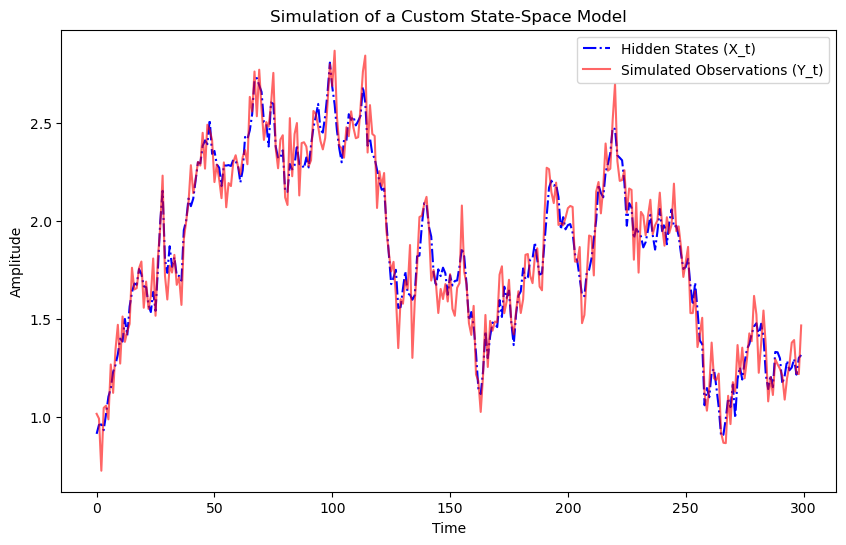

In [154]:
# Simulation
num_steps = 300
hidden_states, simulated_observations = model_instance.simulate(num_steps)

# Data
plt.figure(figsize=(10, 6))
plt.plot(hidden_states, label="Hidden States (X_t)", linestyle="-.", color='blue')
plt.plot(simulated_observations, label="Simulated Observations (Y_t)", alpha=0.6, color='red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Simulation of a Custom State-Space Model")
plt.show()


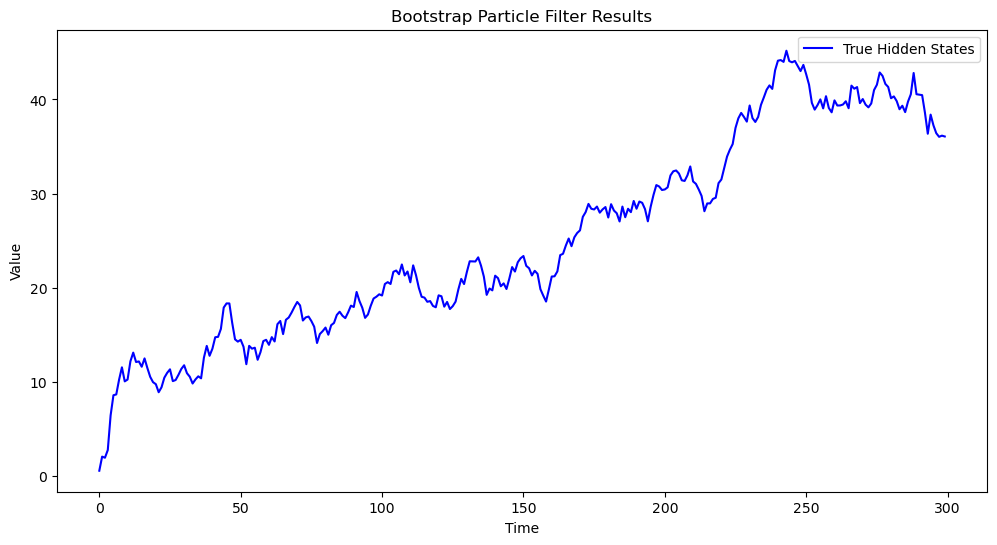

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import particles
import particles.state_space_models as ssm
import particles.distributions as dists

# Paramètres pour le modèle et les simulations
transition_noise_std = 1.0
observation_noise_std = 0.5
num_steps = 300  # Nombre de pas de temps
num_particles = 100  # Nombre de particules pour le filtre de particules

# Simuler les états cachés et les observations
model_instance = SimpleStateSpaceModel(transition_noise_std=transition_noise_std)
hidden_states, simulated_observations = model_instance.simulate(num_steps)

# Créer un filtre de particules
particle_filter = particles.SMC(fk=ssm.Bootstrap(ssm=model_instance, data=simulated_observations), N=num_particles)
particle_filter.run()

# Extraire les états filtrés (estimation des états cachés)
estimated_states = particle_filter.X.mean(axis=0)  # Moyenne des états des particules

# Tracer les résultats
plt.figure(figsize=(12, 6))
plt.plot(hidden_states, label='True Hidden States', linestyle='-', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Bootstrap Particle Filter Results')
plt.show()


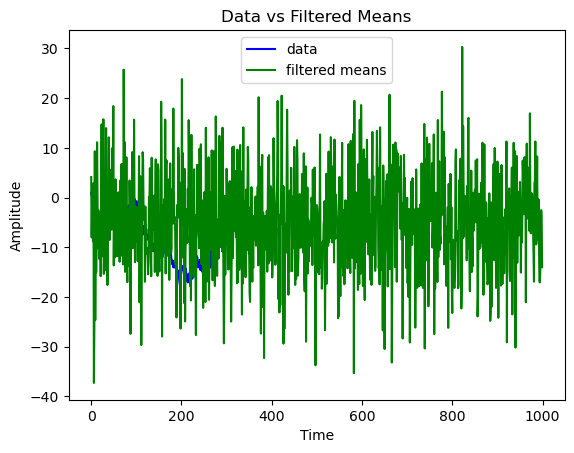

In [136]:
# Pour afficher les données et les moyennes filtrées
plt.plot(u_t, label='data', color='blue')
plt.plot(alg.X, label='filtered means', color='green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Data vs Filtered Means")
plt.show()
